## Module Import

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step1

### Reading data

In [48]:
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.columns = df.columns.str.strip()
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [49]:
df.shape

(7560, 6)

In [50]:
### changing date columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [51]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [52]:
df.select_dtypes(include='number').describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


### Data Wrangling

In [54]:
### checking for missing values
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [55]:
### No missing values found

In [56]:
# Normalizing 'Unit' and 'Sales' columns using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['Unit','Sales']
df[['normalized_units', 'normalized_sales']] = scaler.fit_transform(df[numeric_cols])
df.head()

,Date,Time,State,Group,Unit,Sales,normalized_units,normalized_sales
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [57]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_of_week'] = df['Date'].dt.dayofweek
df.head()

,Date,Time,State,Group,Unit,Sales,normalized_units,normalized_sales,Day,Month,Year,Day_of_week
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,1,10,2020,3
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,1,10,2020,3
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,1,10,2020,3
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,1,10,2020,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,1,10,2020,3


#### Month wise sales analysis

<Figure size 1000x600 with 0 Axes>

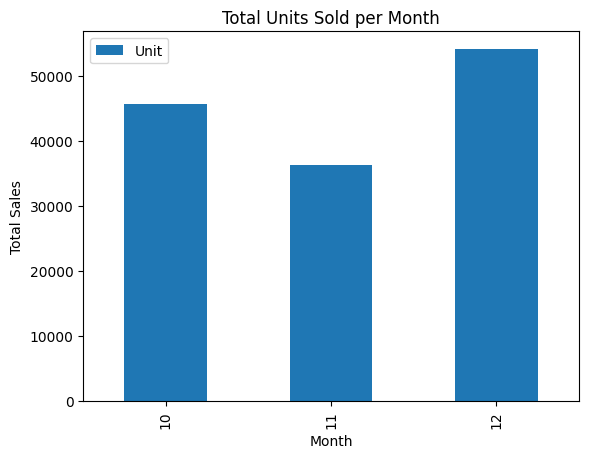

In [58]:
plt.figure(figsize=(10,6))
df.groupby('Month').agg({'Unit': 'sum'}).plot(kind='bar')
plt.title('Total Units Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

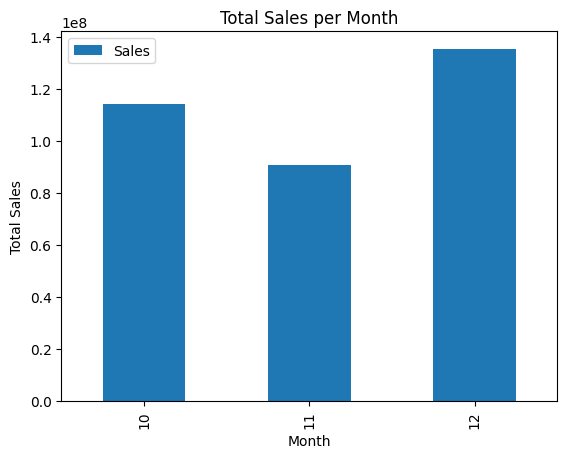

In [59]:
plt.figure(figsize=(10,6))
df.groupby('Month').agg({'Sales': 'sum'}).plot(kind='bar')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [60]:
### Inference:
### Decemeber has the highest sales and units sold, while November has the lowest.

#### Time and day of week wise unit and sales analysis 

<Figure size 1000x600 with 0 Axes>

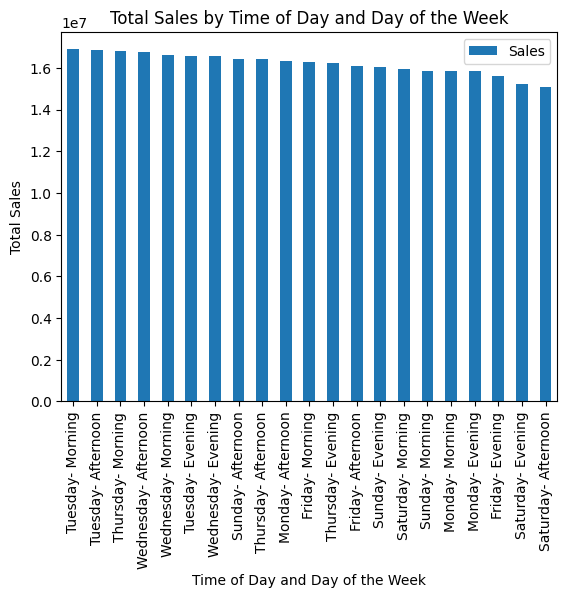

In [61]:
plt.figure(figsize=(10,6))
df['Day_of_week'] = df['Day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['Time_Day'] = df['Day_of_week'].astype(str) + "-" + df['Time']
df.groupby('Time_Day').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).plot(kind='bar')
plt.title('Total Sales by Time of Day and Day of the Week')
plt.xlabel('Time of Day and Day of the Week')
plt.ylabel('Total Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

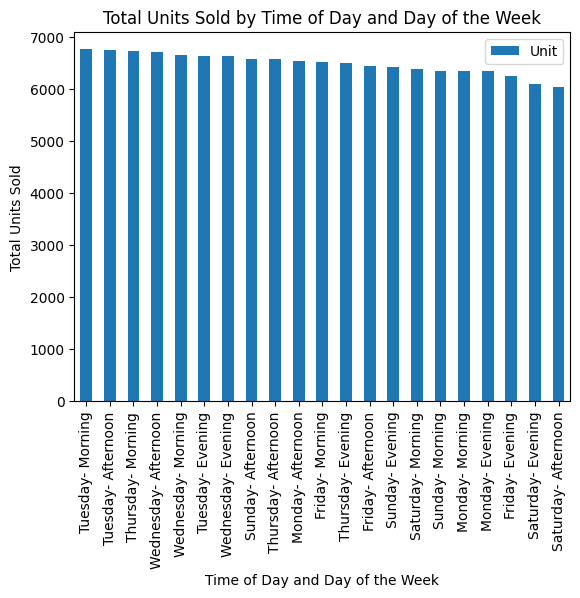

In [62]:
plt.figure(figsize=(10,6))
df.groupby('Time_Day').agg({'Unit': 'sum'}).sort_values(by='Unit', ascending=False).plot(kind='bar')
plt.title('Total Units Sold by Time of Day and Day of the Week')
plt.xlabel('Time of Day and Day of the Week')
plt.ylabel('Total Units Sold')
plt.show()

In [63]:
### Inference:
### Highest sales occur on Tuesday-Morning.
### Lowest sales occur on Saturday-Afernoon.

## Step2

### Data analysis

In [64]:
### a.Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]
sales_std = df['Sales'].std()
unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode()[0]
unit_std = df['Unit'].std()
print(f"Sales - Mean: {sales_mean}, Median: {sales_median}, Mode: {sales_mode}, Standard Deviation: {sales_std}")
print(f"Unit - Mean: {unit_mean}, Median: {unit_median}, Mode: {unit_mode}, Standard Deviation: {unit_std}")


Sales - Mean: 45013.5582010582, Median: 35000.0, Mode: 22500, Standard Deviation: 32253.506943966073
Unit - Mean: 18.00542328042328, Median: 14.0, Mode: 9, Standard Deviation: 12.90140277758643


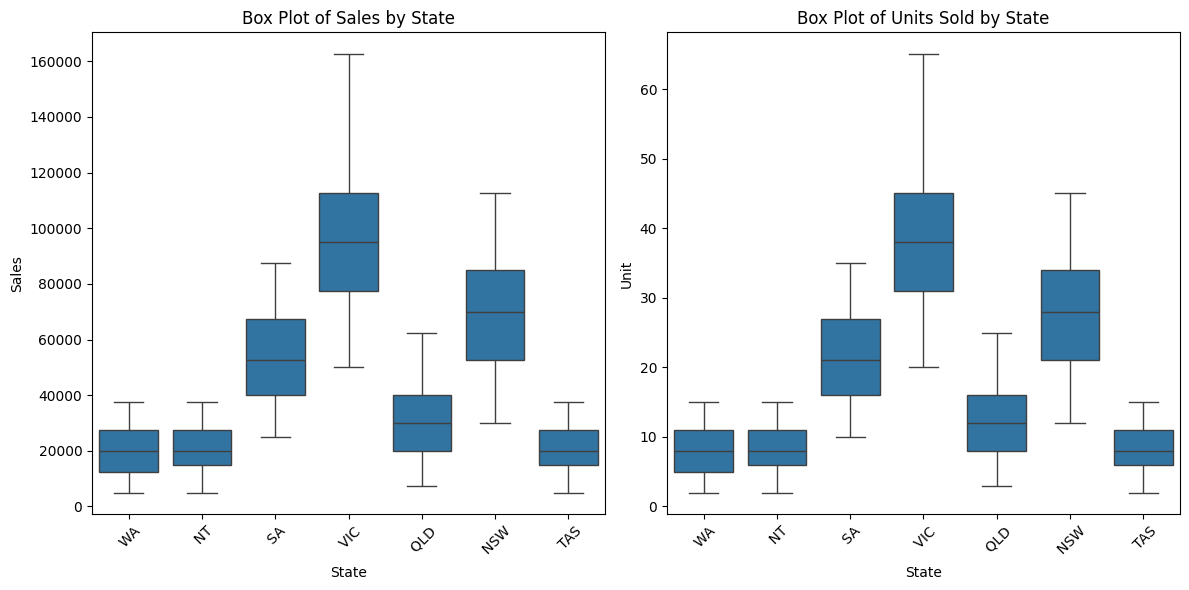

In [65]:
plt.figure(figsize=(12, 6))

# Box plot for Sales
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='State', y='Sales')
plt.title('Box Plot of Sales by State')
plt.xticks(rotation=45)

# Box plot for Units
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='State', y='Unit')
plt.title('Box Plot of Units Sold by State')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [66]:
### Inference:
### Most of the Sales and Units Sold data points are concentrated around the mean.
### The variability in sales and units sold differs across states, with some states showing a wider range of values like VIC and NSW, 
# while others like TAS and NT have a narrower range.
### No outliers are observed in the sales and units sold data across different states.

In [67]:
### b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

sale_pergroup = df.groupby('Group').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False)
max_sales_group = sale_pergroup['Sales'].idxmax()
min_sales_group = sale_pergroup['Sales'].idxmin()
print(f"Group with highest sales: {max_sales_group}")
print(f"Group with lowest sales: {min_sales_group}")


Group with highest sales:  Men
Group with lowest sales:  Seniors


<Figure size 1000x600 with 0 Axes>

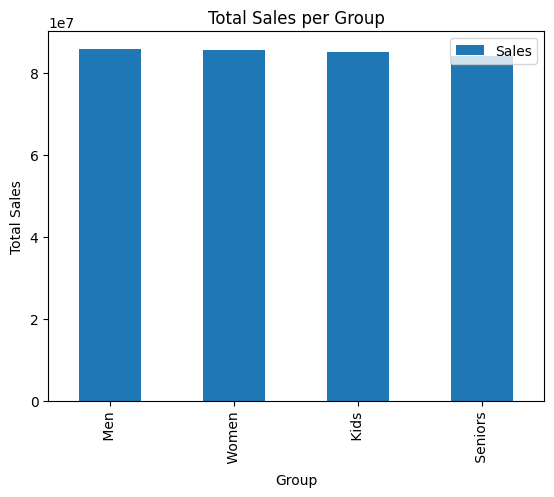

In [68]:
### bar plot for sales per group
plt.figure(figsize=(10,6))
sale_pergroup.plot(kind='bar')
plt.title('Total Sales per Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.show()

In [69]:
### Inference:
### Groupwise, Men has the highest sales while Seniors has the lowest sales.

In [70]:
### c. Identify the group with the highest and lowest sales based on the data provided.
# This appears to be a repetition of part b. Assuming it is a mistake and skipping.

In [71]:
### d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

df['Week'] = df['Date'].dt.isocalendar().week
weekly_report = df.groupby('Week').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index().sort_values(by='Sales')
monthly_report = df.groupby('Month').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index().sort_values(by='Sales')
quarterly_report = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

C:\Users\Saptarshi\AppData\Local\Temp\ipykernel_26056\965076724.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()


In [72]:
weekly_report.head()

,Week,Sales,Unit
13,53,13792500,5517
0,40,15045000,6018
5,45,20865000,8346
7,47,21112500,8445
6,46,21172500,8469


In [73]:
monthly_report.head()

,Month,Sales,Unit
1,11,90682500,36273
0,10,114290000,45716
2,12,135330000,54132


In [74]:
quarterly_report.head()

,Date,Sales,Unit
0,2020-12-31,340302500,136121


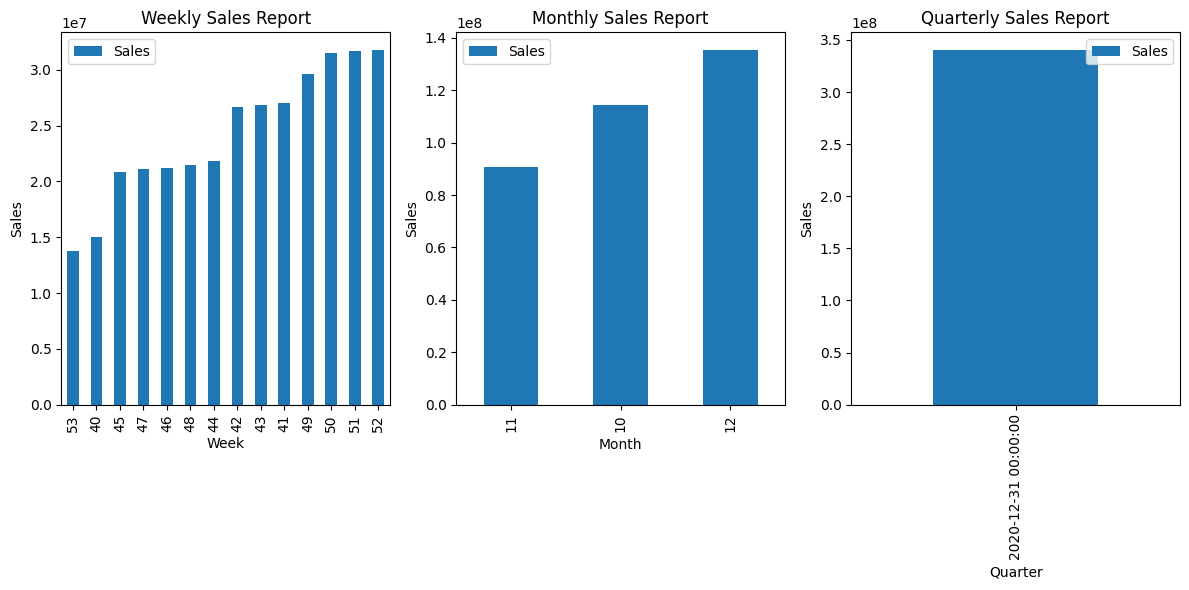

In [75]:
### bar plot of weekly, monthly, and quarterly reports
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
weekly_report.plot(x='Week', y='Sales', kind='bar', ax=plt.gca())
plt.title('Weekly Sales Report')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.subplot(1, 3, 2)
monthly_report.plot(x='Month', y='Sales', kind='bar', ax=plt.gca())
plt.title('Monthly Sales Report')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.subplot(1, 3, 3)
quarterly_report.plot(x='Date', y='Sales', kind='bar', ax=plt.gca())
plt.title('Quarterly Sales Report')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


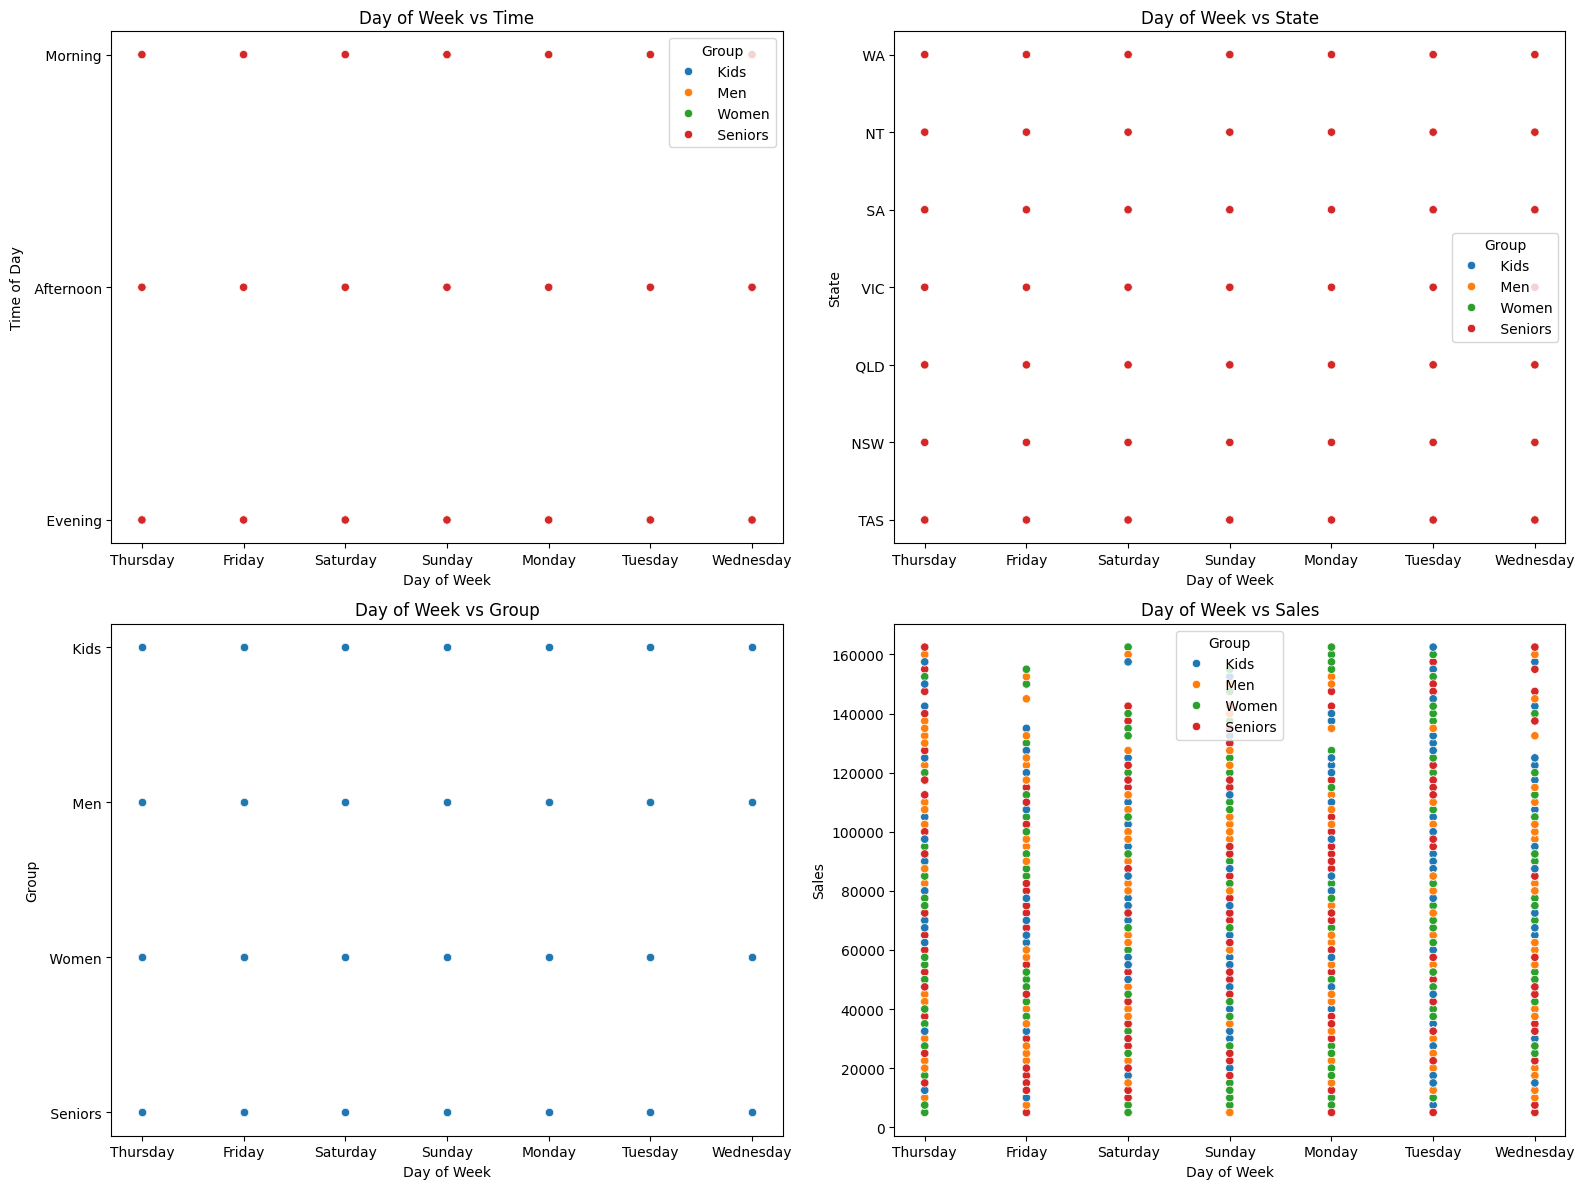

In [76]:
### day of week vs time / day of week vs state / day of week vs grpup / day of week vs unit / day of week vs sales 
# day of week vs time hue on group 
# prepare the 4 graphs as a subplot
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Day_of_week', y='Time', hue='Group')
plt.title('Day of Week vs Time')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Day_of_week', y='State', hue='Group')
plt.title('Day of Week vs State')
plt.xlabel('Day of Week')
plt.ylabel('State')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Day_of_week', y='Group')
plt.title('Day of Week vs Group')
plt.xlabel('Day of Week')
plt.ylabel('Group')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Day_of_week', y='Sales', hue='Group')
plt.title('Day of Week vs Sales')
plt.xlabel('Day of Week')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()



In [77]:
### Infence:
### Maximum sales happen in week 52 but the sales drop down to the least in week 53.
### Maximum sales happen in December while minimum sales happen in November.
### There is only one quarter in the data provided, so no comparison can be made.
### The sales of all group are uniformly spread across the weeks at all time of the day with no significant peaks or troughs.

## Step3

### Data visualization

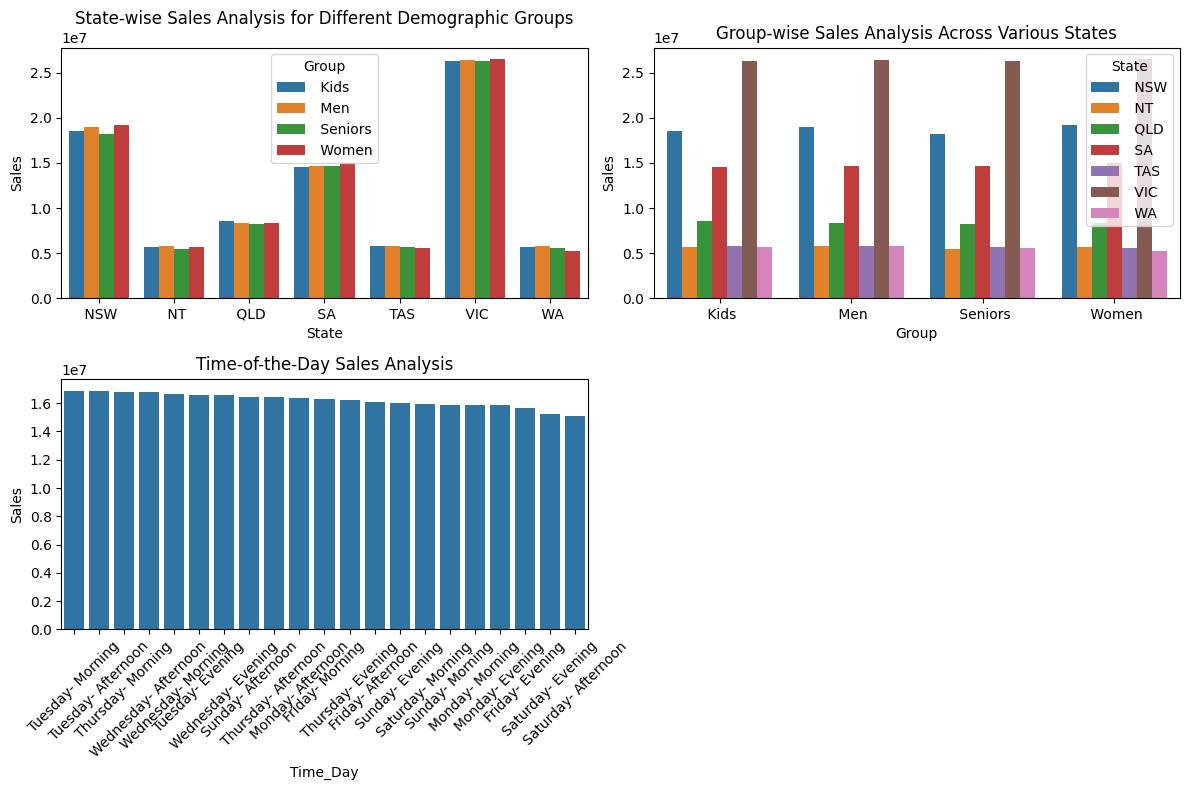

In [78]:
### a. Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
# State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
# Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df1 = df.groupby(['State', 'Group'], as_index=False)['Sales'].sum()
sns.barplot(data=df1, x='State', y='Sales', hue='Group', errorbar=None)
plt.title('State-wise Sales Analysis for Different Demographic Groups')

plt.subplot(2, 2, 2)
df2 = df.groupby(['Group', 'State'], as_index=False)['Sales'].sum()
sns.barplot(data=df2, x='Group', y='Sales', hue='State', errorbar=None)
plt.title('Group-wise Sales Analysis Across Various States')

plt.subplot(2, 2, 3)
df3 = df.groupby('Time_Day', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sns.barplot(data=df3, x='Time_Day', y='Sales', errorbar=None)
plt.title('Time-of-the-Day Sales Analysis')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [79]:
### Inference:
### From the state-wise sales analysis, we can see that in every state all groups perfrom pretty similar. 
### However, VIC is the best performing state while WA is the worst performing state.
### Highest sales occur on Tuesday-Morning.
### Lowest sales occur on Saturday-Afernoon.

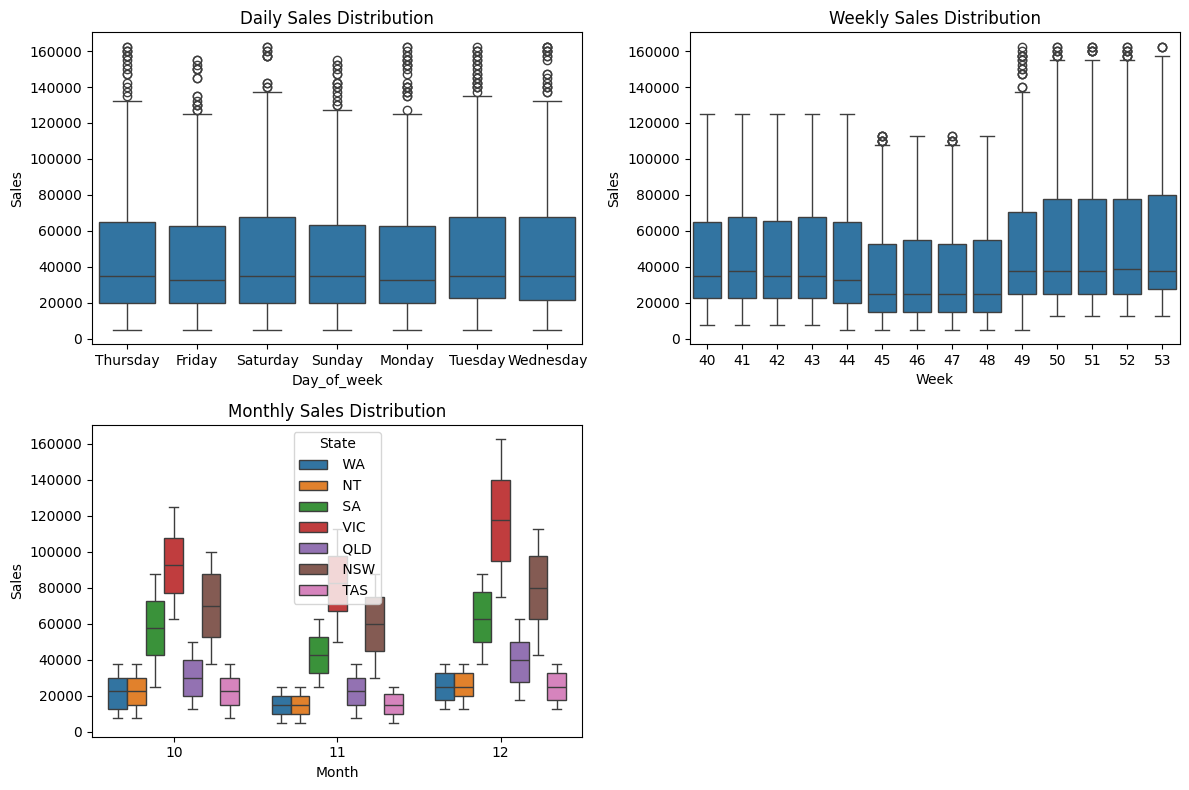

In [80]:
### Box plots for daily, weekly, monthly, and quarterly sales
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Day_of_week'], y=df['Sales'])
plt.title('Daily Sales Distribution')
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Week'], y=df['Sales'])
plt.title('Weekly Sales Distribution')
plt.subplot(2, 2, 3)

sns.boxplot(data=df, x='Month', y='Sales', hue='State')
plt.title('Monthly Sales Distribution')
plt.tight_layout()
plt.show()


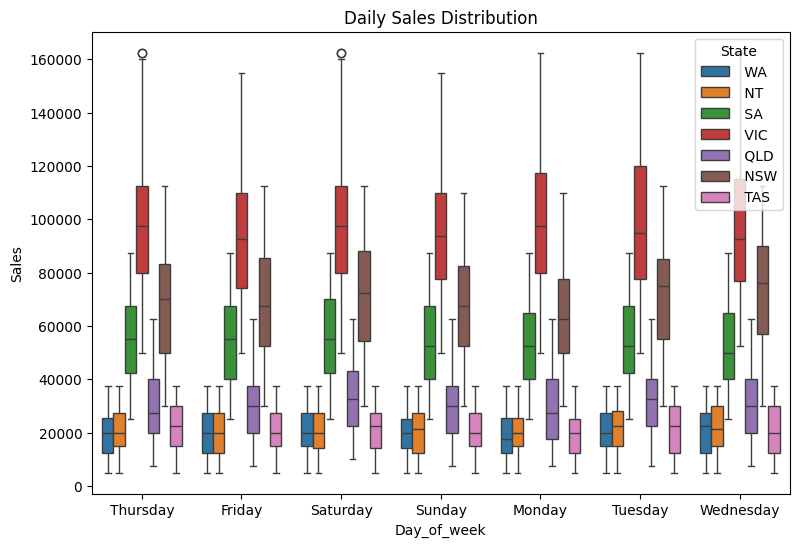

In [81]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Day_of_week', y='Sales', hue='State')
plt.title('Daily Sales Distribution')
plt.show()

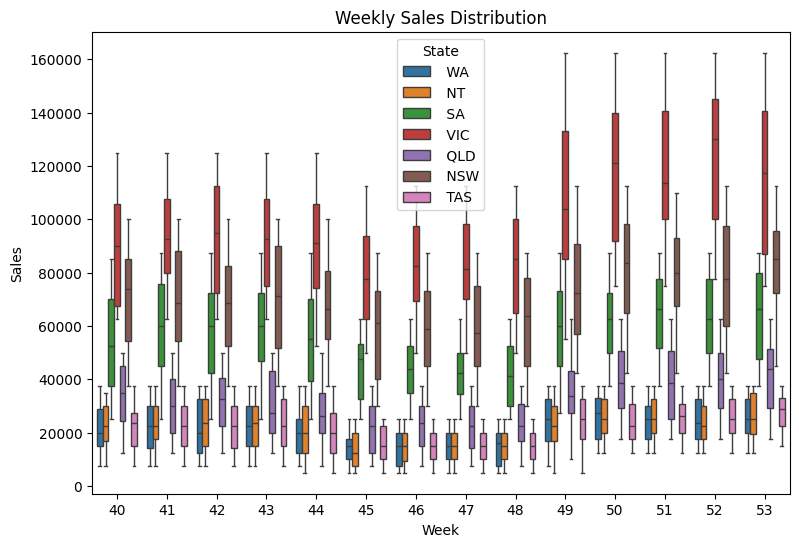

In [82]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Week', y='Sales', hue='State')
plt.title('Weekly Sales Distribution')
plt.show()

In [83]:
### Inference:
### All days of week have some outliers in sales, with none of the days having significant variability. 
### However most of the outliers are from states like VIC and NSW which have higher sales compared to other states.
### The distribution of sales across the days are right skewed.
### The weeks at the end of the year have outlier sales numbers.
### Again, that is mostly doen to the profitable states like VIC and NSW.
### Obviously, December seem to have a few outlier Sales numbers as well.
### However, if we consider states as hue, no outliers are observed in the monthly sales distribution. 
### Some of the states like VIC and NSW show higher numbers in sales compared to others and that's why we see the overall boxplot for month showing outliers.

In [84]:
### We have used seaborn and matplotlib for data visualization and pandas for data manipulation to create the dashboard.
### Seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

In [85]:
### Recomendations:
### Based on the analysis, it is recommended to focus marketing efforts in VIC as it shows the highest sales across all demographic groups.
### Additionally, promotional campaigns can be targeted during peak sales periods, particularly on Tuesday mornings, to maximize impact.
### December also shows high sales, so end-of-year promotions could be beneficial.
### Men demographic group shows the highest sales, so tailored marketing strategies for this group could further enhance sales.
### VIC is the most profitable state, hence marketing resources should be concentrated there to capitalize on existing demand.

In [86]:
### States with lower revenues: WA, NT, TAS
### Suggested Sales Programs:
### 1. Targeted Promotions: Create special discounts and offers specifically for customers in WA, NT, and TAS to attract more buyers.
### 2. Local Events: Organize local events or pop-up shops in these states to increase brand visibility and engagement.
### 3. Collaborations: Partner with local influencers or businesses to promote products and reach a wider audience.
### 4. Seasonal Campaigns: Launch seasonal marketing campaigns that resonate with the local culture and preferences of these states.
### 5. Customer Loyalty Programs: Implement loyalty programs to retain existing customers and encourage repeat purchases
### 6. Target a few days and time slots where sales are low and run special promotions during those periods to boost sales.